In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import calendar as cd
dataset=pd.read_csv("C://AP/Lab1/dataset.csv", header=None, names=["Date", "Course"])
print(dataset)

            Date    Course
0            NaN  100.3232
1     2023-10-10       NaN
2     2023-10-06   99.6762
3     2023-10-05   99.4555
4     2023-10-04   99.2677
...          ...       ...
7189  1992-07-15  130.2000
7190  1992-07-10  130.3000
7191  1992-07-08  130.5000
7192  1992-07-03  134.8000
7193  1992-07-01  125.2600

[7194 rows x 2 columns]


In [2]:
def NormalDataset(dataset:pd.DataFrame)->pd.DataFrame:
    '''Убираем NaN, добавляем медиану и ср знач'''
    dataset.replace("None",pd.NaT)
    dataset.dropna(inplace=True, ignore_index=True)
    """До 1998 был советский рубль который в 1000 раз меньше современного"""
    for i in range(len(dataset["Date"])):
        if dataset["Date"][i][:4] in map(str,range(1992,1998)):
            dataset.loc[i,"Course"]/=1000
    median=dataset["Course"].median()
    mean=dataset["Course"].mean()
    print(median)
    print(mean)
    dataset["Relative_median"]=dataset.apply(lambda row: abs(row["Course"]-median),axis=1)
    dataset["Relative_mean"]=dataset.apply(lambda row: abs(row["Course"]-mean),axis=1)
    dataset = dataset.sort_values(by="Date", ignore_index=True)
    return dataset
dataset=NormalDataset(dataset)
print(dataset)

30.371899999999997
37.40891519187986
            Date    Course  Relative_median  Relative_mean
0     1992-07-01   0.12526         30.24664      37.283655
1     1992-07-03   0.13480         30.23710      37.274115
2     1992-07-08   0.13050         30.24140      37.278415
3     1992-07-10   0.13030         30.24160      37.278615
4     1992-07-15   0.13020         30.24170      37.278715
...          ...       ...              ...            ...
7187  2023-09-30  97.41470         67.04280      60.005785
7188  2023-10-03  98.47850         68.10660      61.069585
7189  2023-10-04  99.26770         68.89580      61.858785
7190  2023-10-05  99.45550         69.08360      62.046585
7191  2023-10-06  99.67620         69.30430      62.267285

[7192 rows x 4 columns]


In [3]:
def FindCourseRelativeMean(dataset:pd.DataFrame, value:float)->pd.DataFrame:
    '''Возвращает датасет в котором, значение отклонения от курса >= заданного значения'''
    return dataset.query('Relative_mean >= @value')
print(FindCourseRelativeMean(dataset,40.0))

            Date   Course  Relative_median  Relative_mean
5286  2016-01-19  78.6678          48.2959      41.258885
5287  2016-01-20  78.4862          48.1143      41.077285
5288  2016-01-21  79.4614          49.0895      42.052485
5289  2016-01-22  83.5913          53.2194      46.182385
5290  2016-01-23  80.5714          50.1995      43.162485
...          ...      ...              ...            ...
7187  2023-09-30  97.4147          67.0428      60.005785
7188  2023-10-03  98.4785          68.1066      61.069585
7189  2023-10-04  99.2677          68.8958      61.858785
7190  2023-10-05  99.4555          69.0836      62.046585
7191  2023-10-06  99.6762          69.3043      62.267285

[211 rows x 4 columns]


In [4]:
def FindCourseInTimeInterval(dataset:pd.DataFrame, first_date:dt.date, last_date:dt.date)->pd.DataFrame:
    '''Возвращает датасет в котором, дата удовлетворяет начальная дата <= дата <= конечная дата'''
    return dataset.query('Date >= @first_date and Date <= @last_date')
print(FindCourseInTimeInterval(dataset, "2020-01-01", "2023-01-01"))

            Date   Course  Relative_median  Relative_mean
6267  2020-01-01  61.9057          31.5338      24.496785
6268  2020-01-10  61.2340          30.8621      23.825085
6269  2020-01-11  61.2632          30.8913      23.854285
6270  2020-01-14  60.9474          30.5755      23.538485
6271  2020-01-15  61.4140          31.0421      24.005085
...          ...      ...              ...            ...
7000  2022-12-27  68.4487          38.0768      31.039785
7001  2022-12-28  69.9346          39.5627      32.525685
7002  2022-12-29  71.3261          40.9542      33.917185
7003  2022-12-30  71.9778          41.6059      34.568885
7004  2022-12-31  70.3375          39.9656      32.928585

[738 rows x 4 columns]


In [5]:
def GroupByMonth(dataset:pd.DataFrame)->pd.DataFrame:
    dataset['Date'] = pd.to_datetime(dataset['Date'], errors='coerce')
    return dataset.groupby([(dataset["Date"].dt.year), (dataset["Date"].dt.month)]).mean()
print(GroupByMonth(dataset))

                                   Date     Course  Relative_median  \
Date Date                                                             
1992 7    1992-07-16 00:00:00.000000000   0.141556        30.230344   
     8    1992-08-16 12:00:00.000000000   0.168162        30.203737   
     9    1992-09-15 08:00:00.000000000   0.220489        30.151411   
     10   1992-10-16 16:00:00.000000000   0.353778        30.018122   
     11   1992-11-15 12:00:00.000000000   0.426250        29.945650   
...                                 ...        ...              ...   
2023 6    2023-06-15 19:25:42.857142784  83.319333        52.947433   
     7    2023-07-15 18:17:08.571428608  90.474048        60.102148   
     8    2023-08-15 15:39:07.826086912  95.285348        64.913448   
     9    2023-09-16 01:05:27.272727296  96.622259        66.250359   
     10   2023-10-04 12:00:00.000000000  99.219475        68.847575   

           Relative_mean  
Date Date                 
1992 7         37.2673

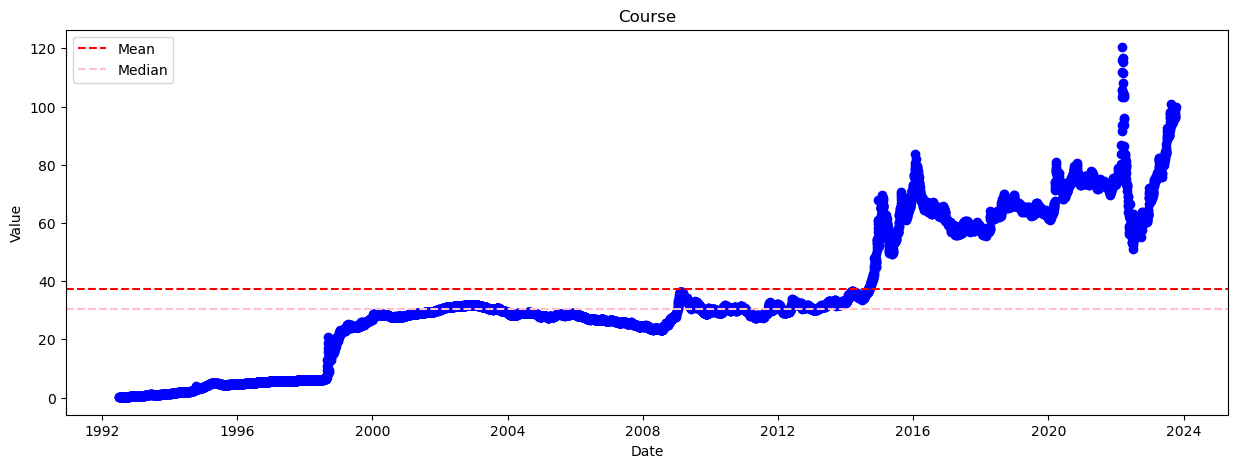

In [6]:
def MakePlot(dataset:pd.DataFrame)->None:
    '''График курса за весь период'''
    fig = plt.figure(figsize=(15, 5))
    plt.ylabel('Value')
    plt.xlabel('Date')
    plt.title('Course')
    x = dataset["Date"]
    y = dataset["Course"]
    y1 = dataset["Course"].mean()
    y2 = dataset["Course"].median()
    plt.scatter(x, y, color='blue', linestyle='-', linewidths=1)
    plt.axhline (y1, color='red', linestyle='--', label='Mean')
    plt.axhline (y2, color='pink', linestyle='--', label='Median') 
    plt.legend()
    plt.show()
MakePlot(dataset)

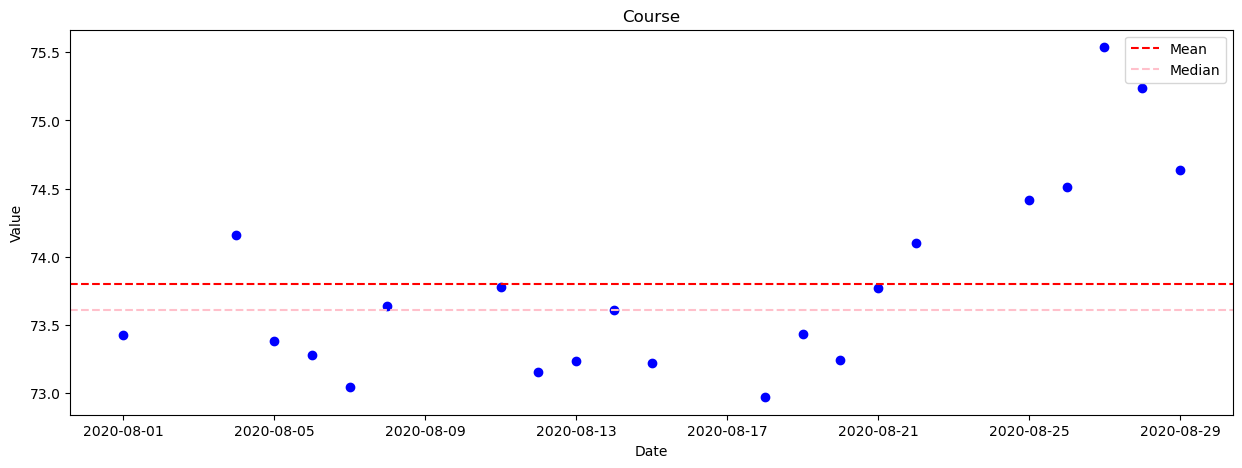

In [7]:
def MakePlotForMonth(dataset:pd.DataFrame, year:int, month:int)->None:
    '''График курса за один месяц'''
    fig = plt.figure(figsize=(15, 5))
    plt.ylabel('Value')
    plt.xlabel('Date')
    plt.title('Course')
    _, last_day = cd.monthrange(year, month)
    first = str(dt.date(year, month, 1))
    last = str(dt.date(year, month, last_day))
    new_df = FindCourseInTimeInterval(dataset, first, last)
    x = new_df["Date"]
    y = new_df["Course"]
    y1 = new_df["Course"].mean()
    y2 = new_df["Course"].median()
    plt.scatter(x, y, color='blue', linestyle='-', linewidths=1)
    plt.axhline (y1, color='red', linestyle='--', label='Mean')
    plt.axhline (y2, color='pink', linestyle='--', label='Median') 
    plt.legend()
    plt.show()
MakePlotForMonth(dataset, 2020, 8)